# Workshop - Data-driven Methods for NVH
### ISNVH 2022
###### Graz, 22 June 2022
###### @Johannes Schmid
###### Chair of Vibroacoustics of Vehicles and Machines
###### Technical University of Munich

## Introduction



### Jupyter Notebook

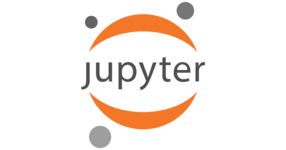

**Pros**:
* Easy to use Python environment
* Executable cells and text, equations to explain
* Present code and results in an interactive way

**Cons**:

*   Local intallation (via Anaconda) necessary
*   Local computational ressources


### Google Colab
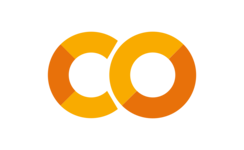

**Pros**:
*   Jupyter Notebook in Google Cloud
* No local Python installation required
* Most packages for data-science (Tensorflow, Numpy, Pandas, Matplotlib) already installed
*   Free to use and computational ressources from Google servers
* Run Neural Network (NN) training on GPU for free!
* Good connectivity (download .ipynb, .py, GitHub, etc.)

**Cons**:
* Google Account necessary
* Internet connection required




### Exercise 1: Getting Started

* Open [Google Colab Link ](https://colab.research.google.com/drive/1yxmRUo4ifFyBK8PT8IHvc9FebwvGI29_#scrollTo=_YaPDhvr7Itd) (from program on the ISNVH website)

* Or type short-URL: [shorturl.at/hyBJP](https://shorturl.at/hyBJP)

* Slides and Data: [GitHub Repo](https://github.com/JDSchmid/ML-Workshop---ISNVH-2022)

Notes:
* Make sure you are connected to the WiFi

> WiFi: Congress Graz\
> Password: ISNVH2022

* Log-in to your Google Account (to be able to execute code cells)
* Accept the warning that this Notebook is not created by Google

Exercise 1:
* Execute the following test code cell (Ctrl + Enter)

In [1]:
# Getting started
print('Welcome to the ML workshop on the ISNVH 2022!')

Welcome to the ML workshop on the ISNVH 2022!


## Neural network implementation

### Intro: Tensorflow and Keras
\

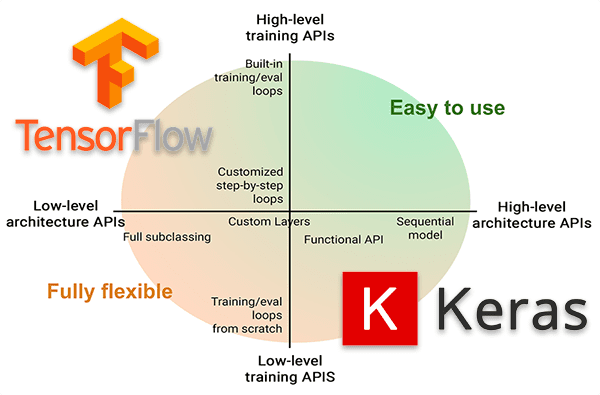

Source: https://pyimagesearch.com/2019/10/21/keras-vs-tf-keras-whats-the-difference-in-tensorflow-2-0/

### Install SciANN

Note: Restart runtime after installing SciANN! \
(Runtime --> Restart runtime)

In [2]:
# Install SciANN
!pip install sciann

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Restart runtime now!
(Runtime --> Restart runtime)

###Import packages

In [3]:
# Import packages
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Load transfer function data

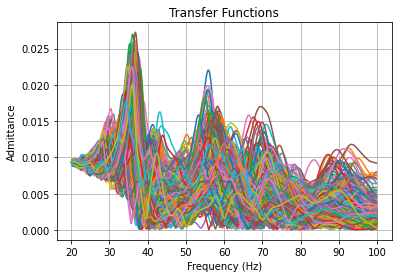

In [4]:
# Load data from GitHub repository

# URL to GitHub repo
url = 'https://raw.githubusercontent.com/JDSchmid/ML-Workshop---ISNVH-2022/main/TF_data.csv'
# Load data as Pandas dataframe
dataframe = pd.read_csv(url)
# Convert dataframe to Numpy array
data = dataframe.to_numpy()
# Extract frequency and TFs from data
f_data = data[:, 0]
Y_data = data[:, 1:]

# Plot transfer function data (N=500)
plt.figure(1)
for i in range(Y_data.shape[1]):
    plt.figure(1)
    plt.plot(f_data, Y_data[:, i])
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Admittance')
    plt.title('Transfer Functions')
plt.grid()
plt.show()

#### Select training and and test data

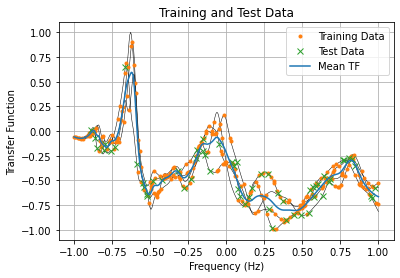

In [5]:
# Select 4 TFs from data
f_input_raw = f_data
Y_input_raw = Y_data[:, 0:4]

# Normalize data in range [a, b]
a = -1
b = 1
f_input = (b-a)*(f_input_raw - np.amin(f_input_raw))/(np.amax(f_input_raw)-np.amin(f_input_raw))+a
Y_input = (b-a)*(Y_input_raw - np.amin(Y_input_raw))/(np.amax(Y_input_raw)-np.amin(Y_input_raw))+a

# Number of data points
N_data = 300

# Set random seed for reproducible results
np.random.seed(10)
# Random choice of frequency steps
rand_ID_freq = np.random.choice(f_input.shape[0], N_data, replace=False)
f_rand = f_input[rand_ID_freq]
# Random choice of TF data
np.random.seed(10)
rand_ID_Y = np.random.choice(Y_input.shape[1], N_data)
Y_rand = Y_input[rand_ID_freq, rand_ID_Y]

# Training data set (80 %)
f_train = f_rand[:int(0.8 * len(f_rand))]
y_train = Y_rand[:int(0.8 * len(Y_rand))]

# Test data set (20 %)
f_test = f_rand[int(0.8 * len(f_rand)):]
y_test = Y_rand[int(0.8 * len(Y_rand)):]

# Mean value of TF
y_mean = np.mean(Y_input, axis = 1)

# Plot training and test data sets
plt.figure(3)
for i in range(Y_input.shape[1]):
    plt.figure(3)
    plt.plot(f_input, Y_input[:, i], color = 'black', linewidth = 0.5)
    plt.xlabel('Normalized Frequency')
    plt.ylabel('Normalized Admittance')
    plt.title('Normalized Transfer Function Data')
plt.plot(f_train, y_train, 'tab:orange', marker='.',linestyle='', label='Training Data')
plt.plot(f_test, y_test, 'tab:green', marker='x',linestyle='', label='Test Data')
plt.plot(f_input, y_mean, 'tab:blue', label= 'Mean TF')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Transfer Function')
plt.title('Training and Test Data')
plt.legend()
plt.grid()
plt.show()

### Network architecture

* 240 input and output neurons
* 4 hidden layers
* 20 neurons per hidden layer
* Hyperbolic tangent activation function (hidden layers)
* Linear output layer (regression!)


\

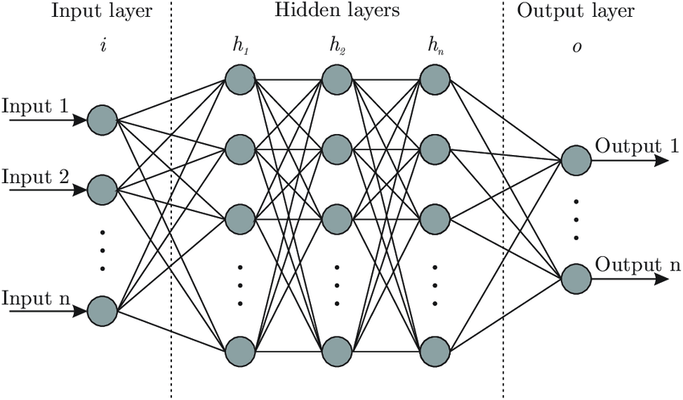

Source: https://towardsdatascience.com/designing-your-neural-networks-a5e4617027ed

### Build NN in Keras

In [6]:
# Definition of the network architecture in Keras
model = keras.Sequential()

# Four hidden layers with 20 neurons each (tanh activation function)
model.add(layers.Dense(20, input_shape=(1,), activation='tanh'))
model.add(layers.Dense(20, activation='tanh'))
model.add(layers.Dense(20, activation='tanh'))
model.add(layers.Dense(20, activation='tanh'))

# Output layer (linear activation function)
model.add(layers.Dense(1))

# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                40        
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 21        
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


#### Loss function and optimizer
\
**Mean-squared error (MSE)**:

$$
\mathrm{MSE}=\frac{1}{N} \sum_{i=1}^{N}\left(y_{i}-\hat{y}_{i}\right)^{2}
$$

**Adam optimizer:**

* First-order gradient based optimization algorithm
* Extension of the stochastic gradient descent
* Uses momentum and adaptive learning rate
* Based on estimation of first-order and second-order moments

\
Reference:\
Kingma, D and Ba, J . (2015) Adam: A method for Stochastic Optimization. Available at: https://arxiv.org/pdf/1412.6980.pdf


In [7]:
# Learning rate
learning_rate = 0.001

# Adam optimization algorithm
opt = keras.optimizers.Adam(learning_rate=learning_rate)

# Mean Squared Error (MSE) loss function
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mean_squared_error'])

#### Training of the NN

In [8]:
# Number of epochs
number_epochs = 2000

# Batch size
batch_size = len(f_train)

# Training and Validation of the NN
history = model.fit(f_train, y_train, epochs=number_epochs, verbose=1, batch_size=batch_size, validation_data=(f_test, y_test))

Epoch 1/2000
1/1 [==============================] - 1s 1s/step - loss: 0.3376 - mean_squared_error: 0.3376 - val_loss: 0.3181 - val_mean_squared_error: 0.3181
Epoch 2/2000
1/1 [==============================] - 0s 45ms/step - loss: 0.2984 - mean_squared_error: 0.2984 - val_loss: 0.2789 - val_mean_squared_error: 0.2789
Epoch 3/2000
1/1 [==============================] - 0s 48ms/step - loss: 0.2628 - mean_squared_error: 0.2628 - val_loss: 0.2437 - val_mean_squared_error: 0.2437
Epoch 4/2000
1/1 [==============================] - 0s 36ms/step - loss: 0.2308 - mean_squared_error: 0.2308 - val_loss: 0.2122 - val_mean_squared_error: 0.2122
Epoch 5/2000
1/1 [==============================] - 0s 42ms/step - loss: 0.2022 - mean_squared_error: 0.2022 - val_loss: 0.1845 - val_mean_squared_error: 0.1845
Epoch 6/2000
1/1 [==============================] - 0s 49ms/step - loss: 0.1770 - mean_squared_error: 0.1770 - val_loss: 0.1605 - val_mean_squared_error: 0.1605
Epoch 7/2000
1/1 [==================

#### Neural network prediction


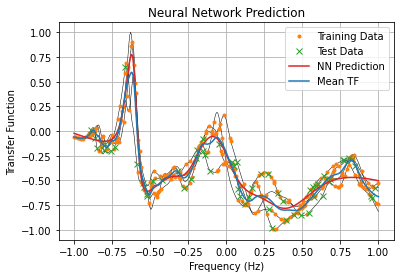

In [9]:
# NN Prediction
# (on data points (N = 400) not used of training)
y_pred = model.predict(f_input)

# Plot training and test data sets
plt.figure(4)
for i in range(Y_input.shape[1]):
    plt.figure(4)
    plt.plot(f_input, Y_input[:, i], color = 'black', linewidth = 0.5)
    plt.xlabel('Normalized Frequency')
    plt.ylabel('Normalized Admittance')
    plt.title('Normalized Transfer Function Data')
plt.plot(f_train, y_train, 'tab:orange', marker='.',linestyle='', label='Training Data')
plt.plot(f_test, y_test, 'tab:green', marker='x',linestyle='', label='Test Data')
plt.plot(f_input, y_pred, 'tab:red', label='NN Prediction')
plt.plot(f_input, y_mean, 'tab:blue', label='Mean TF')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Transfer Function')
plt.title('Neural Network Prediction')
plt.legend()
plt.grid()
plt.show()

#### Plot training loss curve

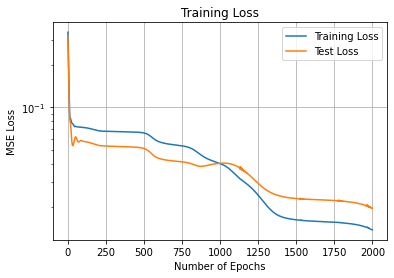

In [10]:
# Plot training loss
plt.figure()
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Test Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('MSE Loss')
plt.title('Training Loss')
plt.legend()
plt.grid()
plt.yscale('log')
plt.show()

## Variational Autoencoder

### Introduction

**VAE Architecture:**
\
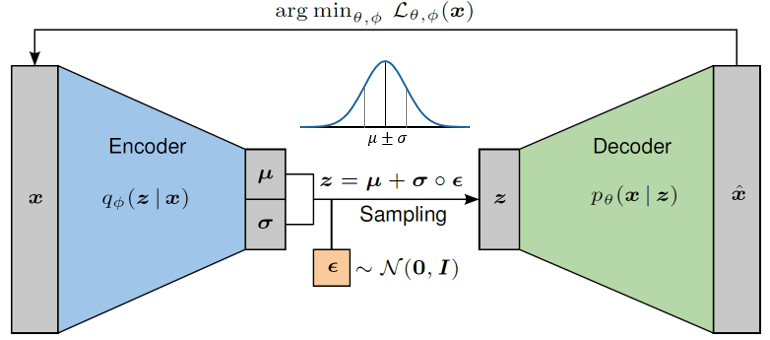

**Idea:**
* Two adjacent neural networks (encoder & decoder)
* Reduce the number of features to the most relevant ones while maintaining the maximum information in the data
* Learn a lower-dimensional representation
* Identify the underlying data generating structure
* VAE deep generative model!

**Probabilistic approach:**
* Encoder and decoder parametrize probability density functions
* Latent variables are parameters of a Gaussian distribution $\mathcal{N}(\mu, \sigma)$
* VAE is trained to learn the identity mapping between the reconstruction and the original input, while enforcing a dimensionality reduction in the latent space

**Variational Inference:**

Bayes' Theorem:

\begin{equation}
p(z\,|\,x)=\frac{p(x\,|\,z)\, p(z)}{p(x)} = \frac{p(x\,|\,z)\,p(z)}{\int p(x\,|\,z)\,p(z)\, \mathrm{d}z}
\end{equation}

Variational distribution:

$$p(z\,|\,x) \approx q_{\lambda}(z\,|\,x) \sim~\mathcal{N}(\mu,\,\sigma)$$

Find variational parameters using optimization:

\begin{equation}
\operatorname*{arg\,min}_{\lambda} \, D_{KL} \Big( q_{\lambda}(z\,|\,x)\, \big\| \, p(z\,|\,x) \Big)
\end{equation}

Kullback-Leiber (KL) divergence:

\begin{equation}
D_{KL} \Big( q(z\,|\,x)\, \big\|\, p(z\,|\,x) \Big) = \mathbb{E}_{q(z\,|\,x)} \bigg[ \log \bigg( \frac{q(z\,|\,x)}{p(z\,|\,x)} \bigg) \bigg]
\end{equation}

with 

$$D_{KL} (q \, | \, p)  \geq 0$$
and
$$D_{KL} (q \, | \, p) = 0, \; \text{if and only if} \; p = q$$

\
**Loss Function:**

\begin{equation}
\begin{split}
\mathcal{L}_{\theta,\phi}(x) = - \underbrace{\mathbb{E}_{q_{\phi}(z | x)} \Big[ \log p_{\theta}(x \,|\, z) \Big]}_{Reconstruction \; loss} + \underbrace{D_{KL} \Big( q_{\phi}(z \,|\, x)\, \big\|\, p(z) \Big)}_{Regularization \; term}.
\end{split}
\end{equation}

\
**Generative Design:**

* Prior assumption:
$$p(z) \sim \mathcal{N}(0,\,1)$$

* Sampling of the latent vector: 

$$z = \mu + \sigma \circ \epsilon; \qquad \epsilon \sim \mathcal{N}(0,\,1)$$

* Reparametrization trick
* Mapping via trained decoder
* Data augmentation method

\
**Reference**: Schmid, J. D., Hildenbrand, A., Gurbuz, C., Luegmair, M. and Marburg, S. “Variational Autoencoders for Dimensionality Reduction of Automotive Vibroacoustic Models”. In: SAE Technical Paper Series. SAE International, 2022.

### VAE implementation in Keras

#### VAE input parameters

In [11]:
# Normalize data on range [0,1]
f_norm = (f_data - np.amin(f_data))/(np.amax(f_data)-np.amin(f_data))
Y_norm = (Y_data - np.amin(Y_data))/(np.amax(Y_data)-np.amin(Y_data))

input_dim = Y_norm.shape[0] #(400)
latent_dim = 100
learn_rate = 0.01
batch_size = 10
act_fun = 'sigmoid'
train_data = np.ndarray.transpose(Y_norm, [1, 0])
number_epochs = 100
samples = 10000  # random samples drawn from VAE decoder

#### Sampling layer

**Linear sampling transformation**:
$$z\sim \mathcal{N}(\mu, \sigma)$$
\
$$z = \mu + \text{exp}(0.5 * \log \sigma^2) \circ \epsilon\,; \qquad \epsilon \sim \mathcal{N}(0,\,I)$$

* Training on log-variance!

In [12]:
# Sampling layer class
class Sampling(layers.Layer):
    def __init__(self, **kwargs):
        super(Sampling, self).__init__(**kwargs)
        self.epsilon = kwargs.pop('epsilon', [])

    def __call__(self, inputs):  # overwrite standard __call__ function of layers.Layer objects
        z_mean_sampling, z_log_var_sampling = inputs  
        batch = tf.shape(z_mean_sampling)[0]
        dim = tf.shape(z_mean_sampling)[1]
        if not self.epsilon:
            self.epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean_sampling + tf.exp(0.5 * z_log_var_sampling) * self.epsilon

#### Encoder definition

In [13]:
# Encoder input
encoder_inputs = keras.Input(shape=(input_dim,))
# Two hidden layers (mu, log variance)
z_mean = layers.Dense(latent_dim, activation=act_fun, name="z_mean")(encoder_inputs)
z_log_var = layers.Dense(latent_dim, activation=act_fun, name="z_log_var")(encoder_inputs)

# Sampling for latent vector z
z = Sampling()([z_mean, z_log_var])
# Define encoder network
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")

#### Decoder definition

In [14]:
# Latent input
latent_inputs = keras.Input(shape=(latent_dim,))
decoder_outputs = layers.Dense(input_dim, activation=act_fun)(latent_inputs)
# Define decoder network
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")

#### Build VAE

Combine encoder and decoder (objects of the VAE model)!

In [15]:
class VAE(keras.Model):
    def __init__(self, encoder_model, decoder_model, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder_model
        self.decoder = decoder_model
        self.total_loss_tracker = keras.metrics.Mean()
        self.reconstruction_loss_tracker = keras.metrics.Mean()
        self.kl_loss_tracker = keras.metrics.Mean()

    def train_step(self, data):
        # Tracks gradient of loss metrics
        with tf.GradientTape(persistent=False, watch_accessed_variables=False) as grad_tape:
            grad_tape.watch(self.trainable_weights)

            # Outputs of encoder (for KL divergence loss)
            z_mean_vae, z_log_var_vae, z_vae = self.encoder(data)

            reconstruction = self.decoder(z_vae)

            # Compute loss function (reconstruction loss + regularization term)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(keras.losses.binary_crossentropy(data, reconstruction), axis=0)
                )
            kl_loss = -0.5 * (1 + z_log_var_vae - tf.square(z_mean_vae) - tf.exp(z_log_var_vae))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=0))
            total_loss = reconstruction_loss + kl_loss

        # Update NN weights
        # Compute gradients
        grads = grad_tape.gradient(total_loss, self.trainable_weights)
        # Adjust weights
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights)) 

        # Update loss tracker variables
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)

        return {
            "total_loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result()
        }

#### Training of VAE

In [16]:
# Training with specified parameters 
vae = VAE(encoder, decoder) 
vae.compile(optimizer=keras.optimizers.Adam(learning_rate=learn_rate))
convergence = vae.fit(train_data, epochs=number_epochs, batch_size=batch_size, verbose=2)

Epoch 1/100
50/50 - 0s - total_loss: 5.8434 - reconstruction_loss: 5.5379 - kl_loss: 0.3054
Epoch 2/100
50/50 - 0s - total_loss: 5.3525 - reconstruction_loss: 5.1506 - kl_loss: 0.2019
Epoch 3/100
50/50 - 0s - total_loss: 5.2624 - reconstruction_loss: 5.0903 - kl_loss: 0.1720
Epoch 4/100
50/50 - 0s - total_loss: 5.1512 - reconstruction_loss: 5.0279 - kl_loss: 0.1233
Epoch 5/100
50/50 - 0s - total_loss: 5.0710 - reconstruction_loss: 4.9904 - kl_loss: 0.0806
Epoch 6/100
50/50 - 0s - total_loss: 5.0058 - reconstruction_loss: 4.9566 - kl_loss: 0.0493
Epoch 7/100
50/50 - 0s - total_loss: 4.9550 - reconstruction_loss: 4.9281 - kl_loss: 0.0269
Epoch 8/100
50/50 - 0s - total_loss: 4.9059 - reconstruction_loss: 4.8983 - kl_loss: 0.0076
Epoch 9/100
50/50 - 0s - total_loss: 4.8830 - reconstruction_loss: 4.8809 - kl_loss: 0.0021
Epoch 10/100
50/50 - 0s - total_loss: 4.8851 - reconstruction_loss: 4.8842 - kl_loss: 8.9564e-04
Epoch 11/100
50/50 - 0s - total_loss: 4.8837 - reconstruction_loss: 4.8831 

#### Sample latent variable z

In [17]:
rng = np.random.default_rng(8)
z_samples = rng.standard_normal(size=(samples, latent_dim))
x_decode = vae.decoder.predict(z_samples)

# Renormalize
x_decode = (x_decode * np.amax(Y_data) - np.amin(Y_data)) + np.amin(Y_data) * np.ones(x_decode.shape)

#### Postprocessing

In [18]:
# Compute statistical moments
std_final = np.std(Y_data, axis=1)
mean_final = np.mean(Y_data, axis=1)
std_predict = np.std(x_decode, axis=0)
mean_predict = np.mean(x_decode, axis=0)

#### Plot VAE results

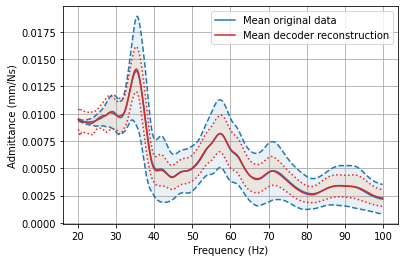

In [19]:
plt.figure()
# Reference original data
plt.plot(f_data, mean_final,color='tab:blue',label='Mean original data')
plt.plot(f_data, mean_final+std_final,color='tab:blue',linestyle='--')
plt.plot(f_data, mean_final-std_final,color='tab:blue',linestyle='--')
# Decoder prediction
plt.plot(f_data, mean_predict,color='tab:red',label='Mean decoder reconstruction')
plt.plot(f_data, mean_predict+std_predict,color='tab:red',linestyle=':')
plt.plot(f_data, mean_predict-std_predict,color='tab:red',linestyle=':')
# Shaded uncertainty band
plt.fill_between(f_data, mean_final+std_final, mean_final-std_final, alpha=0.1)
plt.fill_between(f_data, mean_predict+std_predict, mean_predict-std_predict, alpha=0.1)

plt.grid(visible=True, which='major', color='0.65', linestyle='-')
plt.grid(visible=True, which='minor', color='0.3', linestyle='--')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Admittance (mm/Ns)')
plt.legend(loc='upper right')
plt.show()

## Supervised NN with SciANN

### Introduction SciANN

Scientific Computational with Artificial Neural Networks (SciANN):


* High-level Deep Learning application programming interface (API)
* Written in Python using Keras and TensorFlow backends
* Enabling fast experimentation with different networks architectures 
* Focus on scientific computations, physics informed deep learing and inversion

\

**Source**: E. Haghighat, R. Juanes: SciANN: A Keras/TensorFlow wrapper for scientific computations and physics-informed deep learning using artificial neural networks, Computer Methods in Applied Mechanics and Engineering (373), 113552 (2021)
https://doi.org/10.1016/j.cma.2020.113552

https://www.sciann.com/

https://github.com/sciann/sciann/



#### Import SciANN


In [20]:
# Import SciANN
import sciann as sn 

---------------------- SCIANN 0.6.6.1 ---------------------- 
For details, check out our review paper and the documentation at: 
 +  "https://www.sciencedirect.com/science/article/pii/S0045782520307374", 
 +  "https://arxiv.org/abs/2005.08803", 
 +  "https://www.sciann.com". 

 Need support or would like to contribute, please join sciann`s slack group: 
 +  "https://join.slack.com/t/sciann/shared_invite/zt-ne1f5jlx-k_dY8RGo3ZreDXwz0f~CeA" 
 
TensorFlow Version: 2.5.3 
Python Version: 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0] 



### Vibration theory (recap)


*   Forced vibration 1-DOF mass-spring system
*   Time dependent ODE with IC's

$$
\begin{gathered}
\frac{\partial^2 u}{\partial t^2}+\omega_0^{2} u= F_0 \sin (\Omega t), \\
u(t=0)=0,\\
\dot{u}(t=0)=0,
\end{gathered}
$$

with

$$\omega_0^2 = \frac{c}{m}.$$

**Analytical solution**:

$$
u(t)=\frac{F_{0}}{\omega_0^{2}-\Omega^{2}}(\sin \Omega t-\eta \,\sin \omega_0 t) ,
$$

with

$$\eta = \frac{\Omega}{\omega_0}.$$

\

Superposition of two sine waves at different frequencies!

### Generating vibration data

Parameters:

$$\begin{align*} 
\omega_0 &= 3 \\ 
\Omega &= 1.5 \cdot \omega_0 \quad (\eta = 1.5)\\
F_0 &= 1
\end{align*}$$

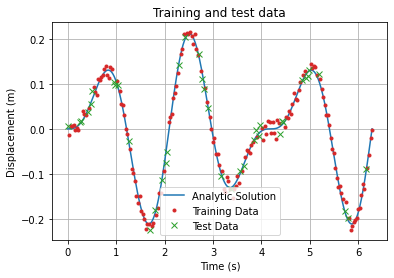

In [21]:
# Parameters of a forced 1-DOF vibration system
omega = 3
omega_exc = omega*1.5
eta = omega_exc/omega
F0 = 1

# Analytic solution (ground truth)
def analyticSolution(t):
    y = (F0/(omega**2 - omega_exc**2))*(np.sin(omega_exc*t) - eta*np.sin(omega*t))
    return y

# Number of data points
N = 200

# Time vectors
t_data = np.linspace(0, 2*np.pi, N)
t_ref = np.linspace(0, 2*np.pi, 1000)

# Generate data from analytic solution
y_data_analy = analyticSolution(t_data)
y_ref = analyticSolution(t_ref)

# Add normally distrubuted noise to data (sigma = 5 %)
std_noise = np.amax(y_ref)*0.05
y_data = y_data_analy + np.random.normal(0, std_noise, len(t_data))

# Split data into training and test sets

# Set random seed for reproducible results
np.random.seed(10)

# Set the random seed for reproducible results
rand_id = np.random.choice(list(range(len(y_data))), size=len(y_data), replace=False)
t_tmp = t_data[rand_id]
y_tmp = y_data[rand_id]
# 
# Training set (80 %)
t_train = t_tmp[:int(0.8 * len(t_data))]
y_train = y_tmp[:int(0.8 * len(y_data))]

# Test set (20 %)
t_test = t_tmp[int(0.8 * len(t_data)):]
y_test = y_tmp[int(0.8 * len(y_data)):]

# Visualize training and test 
plt.figure()
plt.plot(t_ref, y_ref, 'tab:blue', label='Analytic Solution')
plt.plot(t_train, y_train, 'tab:red', marker='.',linestyle='', label='Training Data')
plt.plot(t_test, y_test, 'tab:green', marker='x',linestyle='', label='Test Data')
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.title('Training and test data')
plt.legend()
plt.grid()
plt.show()


### Build NN using SciANN


In [22]:
# Define input variable
x = sn.Variable('x')
# Define output variable
o = sn.Field('y')
# Define neural network with tanh activation function
y_tanh = sn.Functional(o, x, 4*[20], 'tanh')
# Define neural network with sin activation function
y_sin = sn.Functional(o, x, 4*[20], 'sin')


#### SciANN model

In [23]:
# Define the taget output of the model
d_tanh = sn.Data(y_tanh)
d_sin = sn.Data(y_sin)
# Build SciANN model
model_supervised_tanh = sn.SciModel(x, d_tanh, loss_func='mse', optimizer='adam')
model_supervised_sin = sn.SciModel(x, d_sin, loss_func='mse', optimizer='adam')
# Give a model summary
model_supervised_tanh.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
x (InputLayer)               [(None, 1)]               0         
_________________________________________________________________
D20b (Dense)                 (None, 20)                40        
_________________________________________________________________
sci_activation_1 (SciActivat (None, 20)                0         
_________________________________________________________________
D20b_2 (Dense)               (None, 20)                420       
_________________________________________________________________
sci_activation_2 (SciActivat (None, 20)                0         
_________________________________________________________________
D20b_3 (Dense)               (None, 20)                420       
_________________________________________________________________
sci_activation_3 (SciActivat (None, 20)                0     

#### Train supervised NN

In [24]:
# Train NN with tanh activation
h_supervised_tanh = model_supervised_tanh.train(
    t_train, 
    y_train, 
    epochs=1000,
    reduce_lr_after=200, 
    adaptive_weights=100, 
    batch_size=80,
    verbose=1
)

# Train NN with sin activation
h_supervised_sin = model_supervised_sin.train(
    t_train, 
    y_train, 
    epochs=1000,
    reduce_lr_after=200, 
    adaptive_weights=100, 
    batch_size=80,
    verbose=1
)


Total samples: 160 
Batch size: 80 
Total batches: 2 


+ NTK evaluation time [s]: 0.11797285079956055 

+ adaptive_weights at epoch 1: [1.0]
Epoch 1/1000
2/2 [==============================] - 0s 14ms/step - batch: 0.5000 - size: 80.0000 - loss: 3.1466 - lr: 0.0010 - time: 0.4271 - loss_weight_0: 1.0000 - loss_gradient_0: 30.9833
Epoch 2/1000
2/2 [==============================] - 0s 7ms/step - batch: 0.5000 - size: 80.0000 - loss: 3.0138 - lr: 0.0010 - time: 0.0858 - loss_weight_0: 1.0000 - loss_gradient_0: 30.9833
Epoch 3/1000
2/2 [==============================] - 0s 7ms/step - batch: 0.5000 - size: 80.0000 - loss: 2.8805 - lr: 0.0010 - time: 0.0976 - loss_weight_0: 1.0000 - loss_gradient_0: 30.9833
Epoch 4/1000
2/2 [==============================] - 0s 8ms/step - batch: 0.5000 - size: 80.0000 - loss: 2.7481 - lr: 0.0010 - time: 0.1001 - loss_weight_0: 1.0000 - loss_gradient_0: 30.9833
Epoch 5/1000
2/2 [==============================] - 0s 8ms/step - batch: 0.5000 - size: 80.0000 

#### Plot supervised training loss

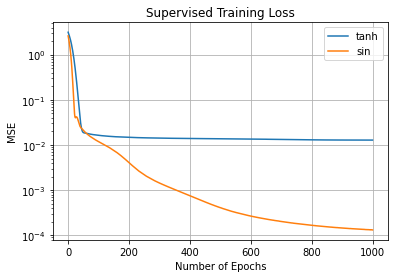

In [25]:
# Plot supervised training loss
plt.semilogy(h_supervised_tanh.history['loss'], label='tanh')
plt.semilogy(h_supervised_sin.history['loss'], label='sin')
plt.xlabel('Number of Epochs')
plt.ylabel('MSE')
plt.title('Supervised Training Loss')
plt.legend()
plt.grid()
plt.show()


#### Supervised NN prediction

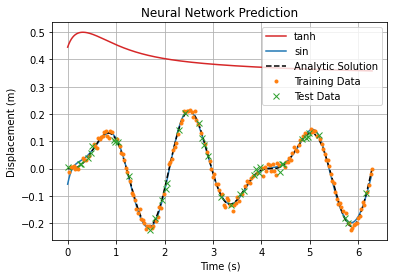

Mean MAE Tanh = 0.40503086860372534
Mean MAE Sin = 0.005501908744845972


In [26]:
# Evaluate supervised NN prediction
y_tanh_pred = y_tanh.eval(t_ref)
y_sin_pred = y_sin.eval(t_ref)

# Compute mean MAE 
MAE_mean_tanh = np.mean(np.absolute(y_tanh_pred - y_ref))
MAE_mean_sin = np.mean(np.absolute(y_sin_pred - y_ref))

plt.figure()
plt.plot(t_ref, y_tanh_pred, 'tab:red', label='tanh')
plt.plot(t_ref, y_sin_pred, 'tab:blue', label='sin')
plt.plot(t_ref, y_ref, '--k', label='Analytic Solution')
plt.plot(t_train, y_train, 'tab:orange', marker='.',linestyle='', label='Training Data')
plt.plot(t_test, y_test, 'tab:green', marker='x',linestyle='', label='Test Data')
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.title('Neural Network Prediction')
plt.legend()
plt.grid()
plt.show()

# Print quantitative mean MAE
print("Mean MAE Tanh = " + str(MAE_mean_tanh))
print("Mean MAE Sin = " + str(MAE_mean_sin))

## Physics-informed Neural Networks (PINNs)

* Use prior-knowledge about the data-generating process (physical ODE)
* No training data needed!
* Instead evaluation of the ODE-residual at collocation points
* Independent ODE solver 
* Incorporate ODE in loss function of NN

\
**PINN Architecture:**

\
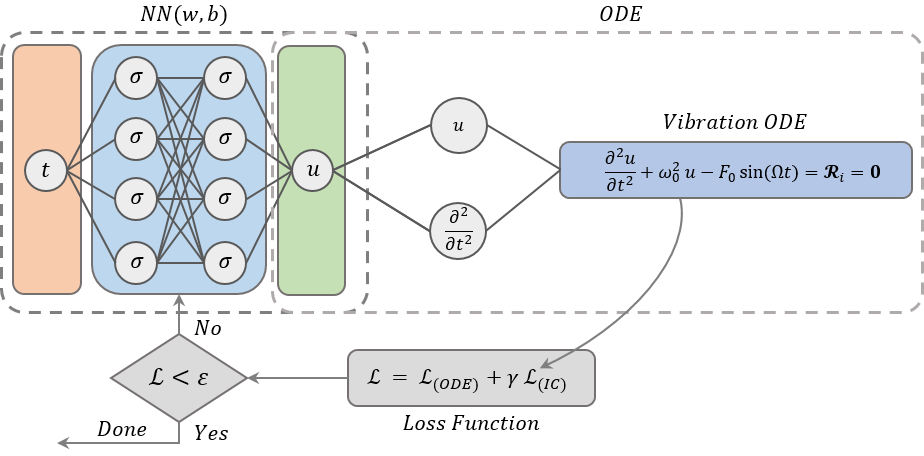

**Vibration ODE:**

$$
\begin{gathered}
\frac{\partial^2 u}{\partial t^2}+\omega_0^{2}\,u= F_0 \sin (\Omega t), \\
u(t=0)=0,\\
\dot{u}(t=0)=0,
\end{gathered}
$$

**Loss Function**:
$$
\underset{\theta \in \mathbb{R}^{D}}{\arg \min } \,\mathcal{L}(\boldsymbol{\theta}):=\lambda_{1}\left|\frac{\partial^{2} u}{\partial t^{2}}+\omega_0^{2} u-F_{0} \sin \Omega t\right|+\lambda_{2}|u(t=0)|+\lambda_{3}\left|\frac{\partial u}{\partial t}(t=0)\right|
$$

\

**Reference**: Schmid, J. D., Bauerschmidt, P., Gurbuz, C. and Marburg, S.: Physics-Informed Neural Networks as Data-Driven Method in Computational Vibroacoustics. In: Leistner, P.: Fortschritte der Akustik - DAGA 2022: 48. Jahrestagung für Akustik, DEGA (2022).

### Build PINN using SciANN

In [27]:
# Define input variable
t = sn.Variable('t')
# Define neural network (4 hidden layers with 20 neurons each) and sin activation function
u = sn.Functional('u', t, 4*[20], 'sin')

#### Define physics-informed loss function

In [28]:
# Define loss function terms
L1 = sn.diff(u, t, order=2) + omega**2*u - F0*sn.sin(omega_exc*t)
L2 = (1 - sn.sign(t)) * u
L3 = (1 - sn.sign(t)) * sn.diff(u, t)

#### Define SciANN model

In [29]:
# SciANN model with physics-informed loss and Adam optimizer
model_PINN = sn.SciModel([t], [sn.PDE(L1),L2,L3], optimizer='adam')

#### Train neural network

In [30]:
# Define collocation points
N_cp = 1000
t_cp = np.concatenate([np.linspace(0, 0., 1000), np.linspace(0, 2*np.pi, N_cp)])

# Train PINN
h_PINN = model_PINN.train(
    t_cp, 
    ['zeros', 'zeros', 'zeros'], 
    epochs=1000,
    reduce_lr_after=100, 
    adaptive_weights=100,
    batch_size=100,
    verbose=1
)


Total samples: 2000 
Batch size: 100 
Total batches: 20 


+ NTK evaluation time [s]: 1.030944585800171 

+ adaptive_weights at epoch 1: [0.10559365417791931, 2.6381975942001343, 0.25620875162194645]
Epoch 1/1000
20/20 [==============================] - 1s 9ms/step - batch: 9.5000 - size: 100.0000 - loss: 0.1455 - sub_loss: 1.3014 - mul_23_loss: 1.0697e-04 - mul_24_loss: 0.0305 - lr: 0.0010 - time: 2.6157 - loss_weight_0: 0.1056 - loss_weight_1: 2.6382 - loss_weight_2: 0.2562 - loss_gradient_0: 9133.6619 - loss_gradient_1: 26.6777 - loss_gradient_2: 433.4800
Epoch 2/1000
20/20 [==============================] - 0s 9ms/step - batch: 9.5000 - size: 100.0000 - loss: 0.0320 - sub_loss: 0.2817 - mul_23_loss: 8.6047e-05 - mul_24_loss: 0.0078 - lr: 0.0010 - time: 0.1856 - loss_weight_0: 0.1056 - loss_weight_1: 2.6382 - loss_weight_2: 0.2562 - loss_gradient_0: 9133.6619 - loss_gradient_1: 26.6777 - loss_gradient_2: 433.4800
Epoch 3/1000
20/20 [==============================] - 0s 8ms/step - b

#### Plot PINN training loss

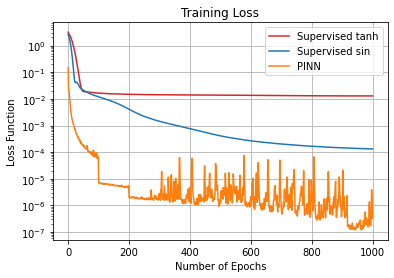

In [31]:
# Plot physics-informed training loss
plt.semilogy(h_supervised_tanh.history['loss'], color='tab:red', label='Supervised tanh')
plt.semilogy(h_supervised_sin.history['loss'], color='tab:blue', label='Supervised sin')
plt.semilogy(h_PINN.history['loss'], color='tab:orange', label='PINN')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss Function')
plt.title('Training Loss')
plt.legend()
plt.grid()
plt.show()

#### Plot PINNs prediction

Mean MAE Tanh = 0.40503086860372534
Mean MAE Sin = 0.005501908744845972
Mean MAE PINN = 0.0008193132209729029


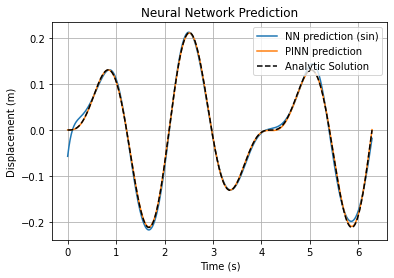

In [32]:
# Evaluate PINN prediction
y_PINN_pred = u.eval(t_ref)

# Compute MAE 
MAE_mean_PINN = np.mean(np.absolute(y_PINN_pred - y_ref))

# Plot PINN prediction
plt.figure()
plt.plot(t_ref, y_sin_pred, 'tab:blue', label='NN prediction (sin)')
plt.plot(t_ref, y_PINN_pred, 'tab:orange', label='PINN prediction')
plt.plot(t_ref, y_ref, '--k', label='Analytic Solution')
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.title('Neural Network Prediction')
plt.legend()
plt.grid()

# Print quantitative mean MAE
print("Mean MAE Tanh = " + str(MAE_mean_tanh))
print("Mean MAE Sin = " + str(MAE_mean_sin))
print("Mean MAE PINN = " + str(MAE_mean_PINN))

## PINN Inverse Identification

**Loss function**:

$$
\underset{\boldsymbol{\theta} \in \mathbb{R}^{D}, \omega_0 \in \mathbb{R}}{\arg \min } \mathcal{L}(\boldsymbol{\theta}, \omega_0):=\lambda_{1}\left|\frac{\partial^{2} u}{\partial t^{2}}+\omega_0^{2} u^{2}-F_{0} \sin (\Omega t)\right|+\lambda_{2}\left|u-u^{*}\right|
$$

### Build inverse SciANN model

In [34]:
# Define parameters
sn.clear_session()
T = sn.Variable('T')
U = sn.Functional('U', T, 4*[20], 'sin')
# Declare inverse pareter to train!
OmegaParam = sn.Parameter(np.random.rand(), inputs=T, name='OmegaParam' )
# Physics-informed loss
L1_inv = sn.diff(U, T, order=2) + OmegaParam**2*U - F0*sn.sin(omega_exc*T)
# Define SciANN model
model_ident = sn.SciModel([T], [sn.Data(U), sn.PDE(L1_inv)], optimizer='adam')

#### Train model (inverse parameter ID)

In [35]:
# Define collocation points
N_cp = 1000
t_cp = np.concatenate([np.linspace(0, 0., 1000), np.linspace(0, 2*np.pi, N_cp)])
# Train model with solution data points
h_ident = model_ident.train(
    t_cp, 
    [analyticSolution(t_cp), 'zeros'], 
    epochs=4000, 
    reduce_lr_after=100,
    adaptive_weights=100, 
    batch_size=100,
    verbose=1,
    log_parameters=[OmegaParam]
)

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
20/20 [==============================] - 0s 12ms/step - batch: 9.5000 - size: 100.0000 - loss: 2.1970e-07 - U_loss: 8.3673e-09 - sub_2_loss: 6.6893e-06 - lr: 3.1250e-05 - time: 0.3123 - loss_weight_0: 1.9696 - loss_weight_1: 0.0304 - loss_gradient_0: 182.9006 - loss_gradient_1: 12016.2214
Epoch 1552/4000
20/20 [==============================] - 0s 13ms/step - batch: 9.5000 - size: 100.0000 - loss: 2.3076e-07 - U_loss: 9.5504e-09 - sub_2_loss: 6.9767e-06 - lr: 3.1250e-05 - time: 0.3084 - loss_weight_0: 1.9696 - loss_weight_1: 0.0304 - loss_gradient_0: 182.9006 - loss_gradient_1: 12016.2214
Epoch 1553/4000
20/20 [==============================] - 0s 12ms/step - batch: 9.5000 - size: 100.0000 - loss: 2.0983e-07 - U_loss: 3.6050e-09 - sub_2_loss: 6.6730e-06 - lr: 3.1250e-05 - time: 0.2950 - loss_weight_0: 1.9696 - loss_weight_1: 0.0304 - loss_gradient_0: 182.9006 - loss_gradient_1: 12016.2214
Epoch 1554/4000
20/20 [========

#### Postprocessing and plot

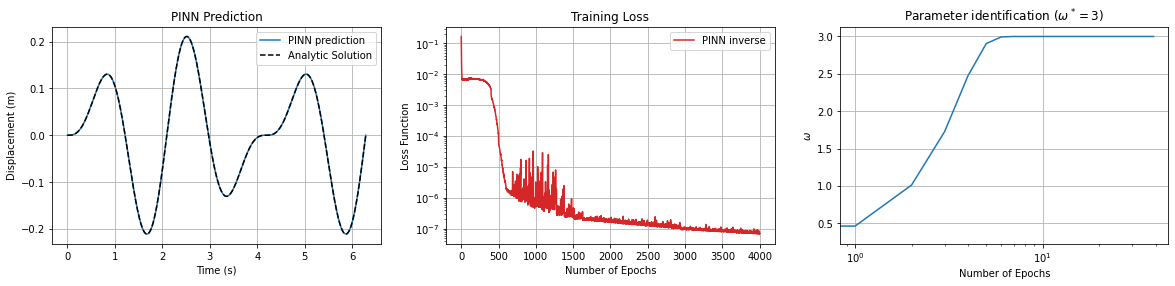

In [36]:
# Evaluate PINN prediction
y_PINN_pred_ident = U.eval(t_ref)

# Plot PINN prediction
fig, ax = plt.subplots(1,3,figsize=(20,4))
ax[0].plot(t_ref, y_PINN_pred_ident, 'tab:blue', label='PINN prediction')
ax[0].plot(t_ref, y_ref, '--k', label='Analytic Solution')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Displacement (m)')
ax[0].set_title('PINN Prediction')
ax[0].legend()
ax[0].grid()

# Plot training loss
ax[1].semilogy(h_ident.history['loss'], color='tab:red', label='PINN inverse')
#ax[1].semilogy(h_PINN.history['loss'], color='tab:blue', label='PINN')
ax[1].set_xlabel('Number of Epochs')
ax[1].set_ylabel('Loss Function')
ax[1].set_title('Training Loss')
ax[1].legend()
ax[1].grid()

# Plot MSE
ax[2].semilogx(h_ident.history['OmegaParam'])
ax[2].set_xlabel('Number of Epochs')
ax[2].set_ylabel('$\\omega$')
ax[2].set_title('Parameter identification ($\\omega^* = 3$)')
ax[2].grid()